# Runs a correlation between replicates in the Sample* datasets - exons edition

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import os
from scipy import stats
from tqdm import tnrange, tqdm_notebook
from collections import defaultdict
from matplotlib_venn import venn2, venn3

In [2]:
input_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/window_outputs/'
cds_input_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/window_outputs_cds_only/'
output_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/pass4/'

In [3]:
all_annotated = sorted(glob.glob(os.path.join(input_dir, 'Sample*.exons.merged.txt')))
print(len(all_annotated))
all_annotated[:3]

45


['/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/window_outputs/Sample11_S29_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.exons.merged.txt',
 '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/window_outputs/Sample12_S30_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.exons.merged.txt',
 '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/window_outputs/Sample13_S31_merged.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated.exons.merged.txt']

# First let's use the Excel sheet to figure out which samples are which.

In [4]:
def convert_line_to_id(row):
    return "{}_{}_{}".format(row['line'], row['dox ng'], row['hours'])

manifest = pd.read_excel('/home/bay001/projects/kris_apobec_20200121/permanent_data/lenti_bulk_replicate_timecourse_IDs.xlsx')
manifest['SampleID'] = manifest.apply(convert_line_to_id, axis=1)

In [5]:
ids = defaultdict(list)

for row in manifest.iterrows():
    ids[row[1]['SampleID']].append("Sample{}_".format(row[1]['sample']))
    
for row in manifest.iterrows():
    ids[row[1]['SampleID']].append("Sample_{}_".format(row[1]['sample']))

In [6]:
samples = defaultdict(list)
for key, prefixes in ids.items():
    for prefix in prefixes:
        try:
            samples[key].append(sorted(glob.glob(os.path.join(input_dir, '{}*.exons.merged.txt'.format(prefix))))[0])
        except IndexError:
            print("{} not found.".format(prefix))

Sample_1_ not found.
Sample_2_ not found.
Sample3_ not found.
Sample_4_ not found.
Sample6_ not found.
Sample_5_ not found.
Sample_7_ not found.
Sample_8_ not found.
Sample9_ not found.
Sample10_ not found.
Sample_11_ not found.
Sample_12_ not found.
Sample_13_ not found.
Sample_14_ not found.
Sample_15_ not found.
Sample_16_ not found.
Sample_17_ not found.
Sample_18_ not found.
Sample_19_ not found.
Sample_20_ not found.
Sample_21_ not found.
Sample_22_ not found.
Sample_23_ not found.
Sample_24_ not found.
Sample_25_ not found.
Sample_26_ not found.
Sample_27_ not found.
Sample_28_ not found.
Sample_29_ not found.
Sample_30_ not found.
Sample_31_ not found.
Sample_32_ not found.
Sample33_ not found.
Sample34_ not found.
Sample35_ not found.
Sample36_ not found.
Sample37_ not found.
Sample38_ not found.
Sample39_ not found.
Sample40_ not found.
Sample_41_ not found.
Sample_42_ not found.


# Run correlation on All exonic edits and CDS-only edits

/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarn

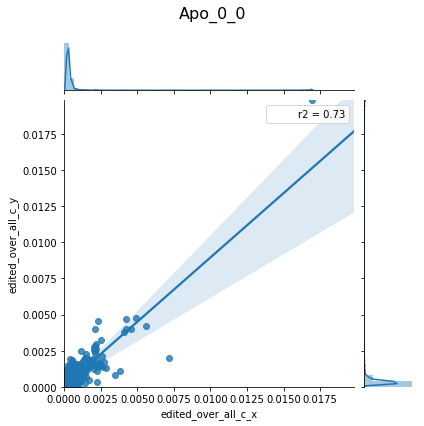

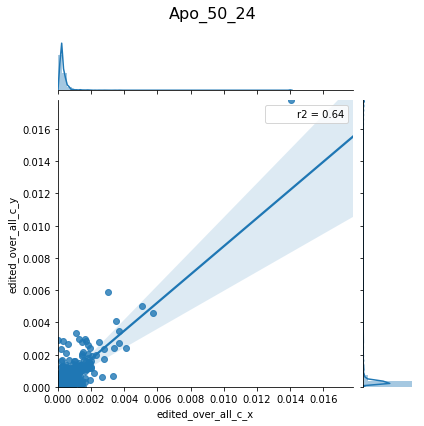

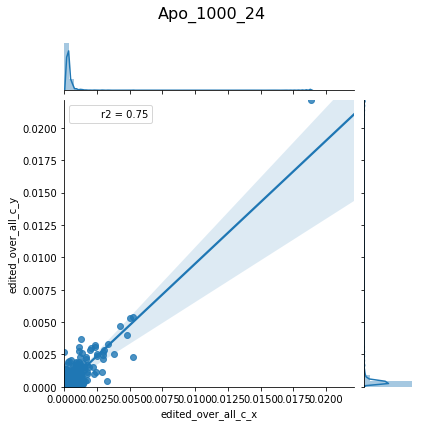

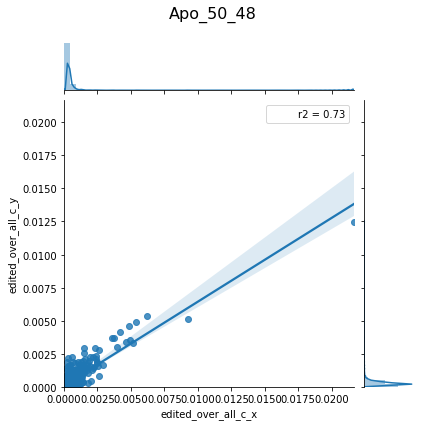

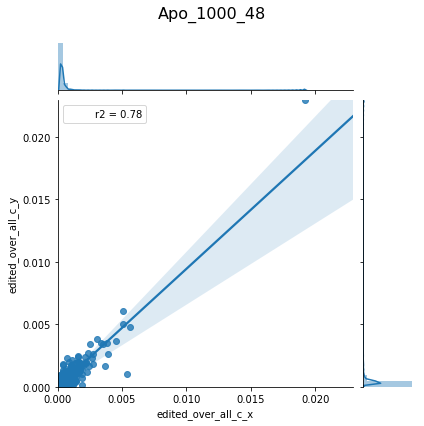

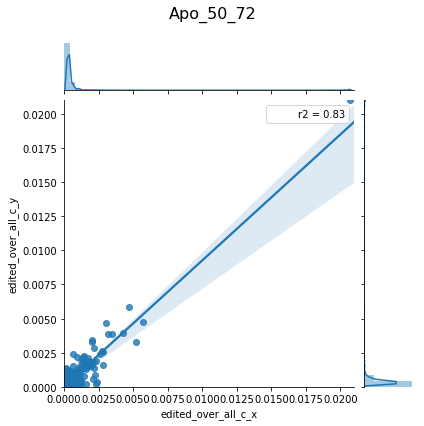

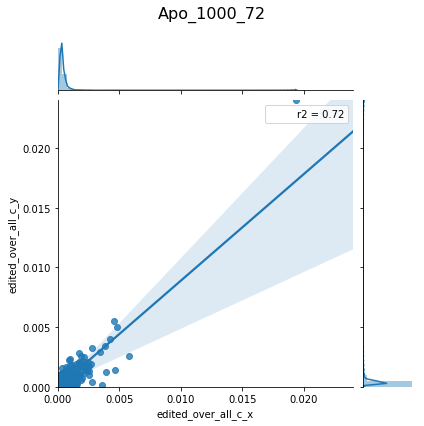

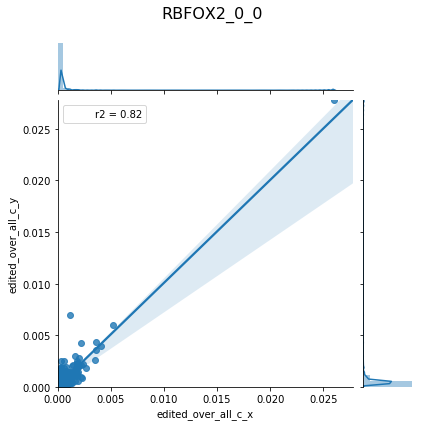

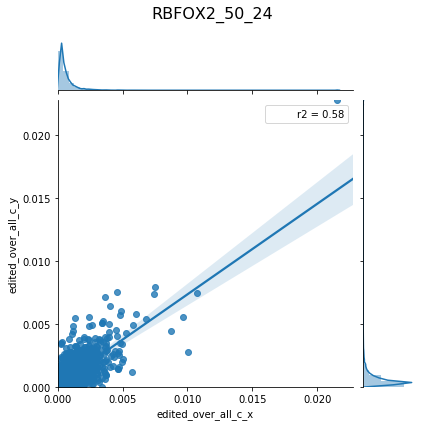

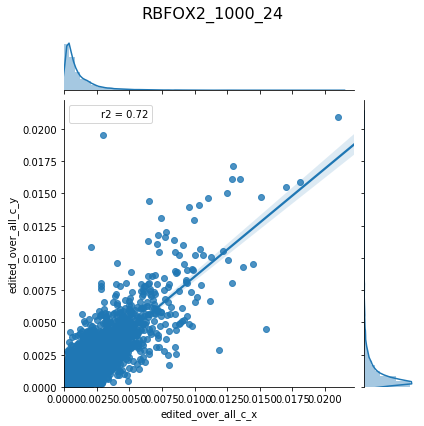

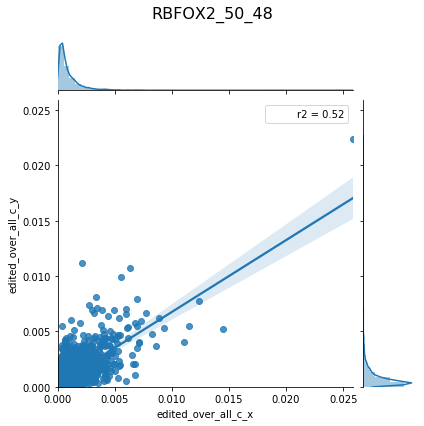

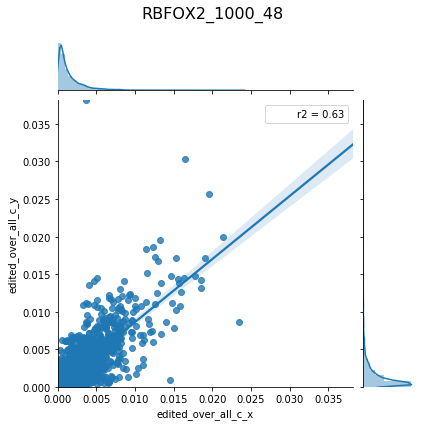

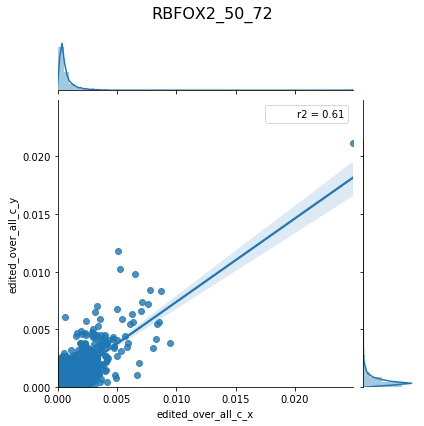

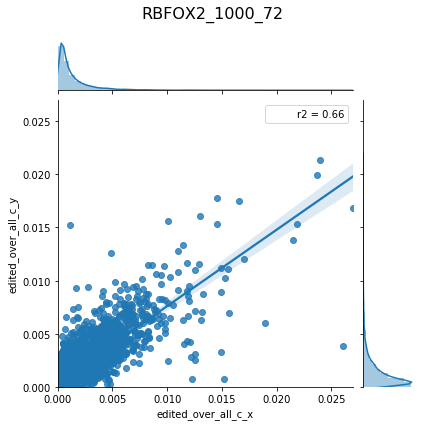

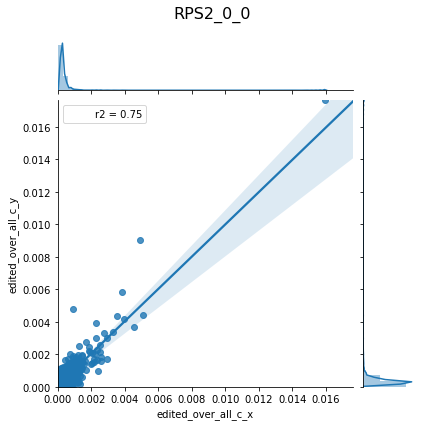

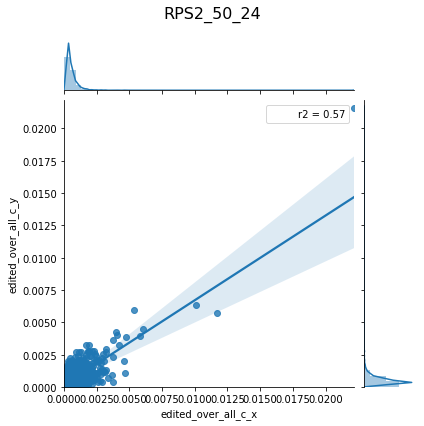

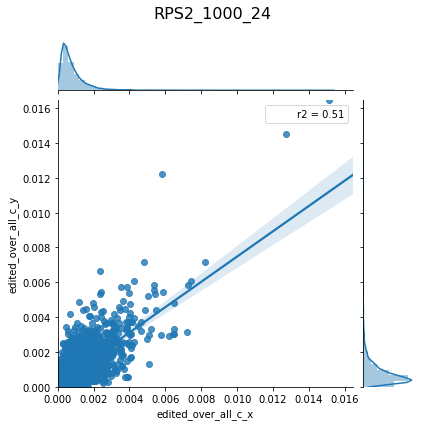

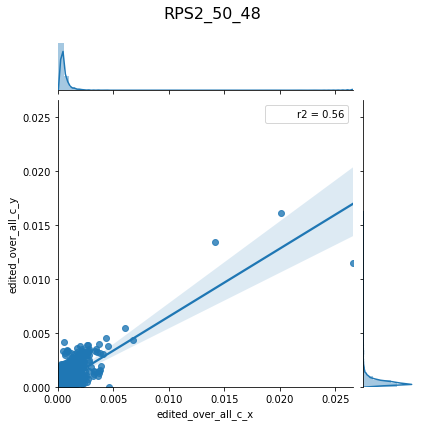

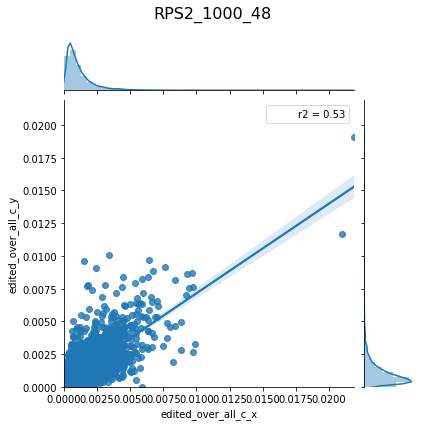

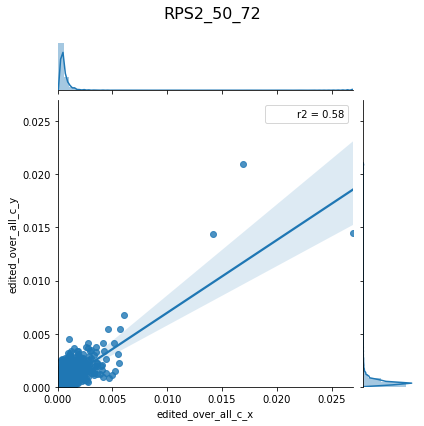

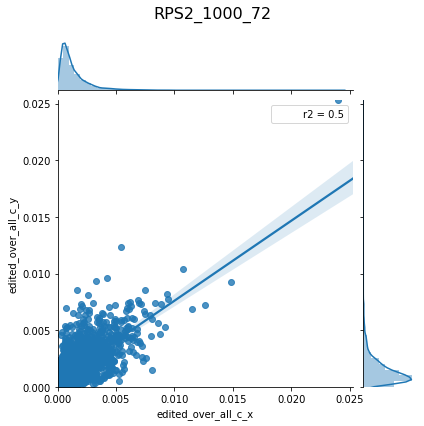

In [7]:
score = 'edited_over_all_c'

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

progress = tnrange(len(samples.keys()))
for key in samples.keys():
    if len(samples[key]) == 2:
        rep1 = pd.read_csv(samples[key][0], sep='\t')[['name',score]]
        rep1['rep'] = 1
        rep2 = pd.read_csv(samples[key][1], sep='\t')[['name',score]]
        rep2['rep'] = 2
        
        reps = pd.concat([rep1, rep2])
        merged = pd.merge(rep1, rep2, left_on=['name'], right_on=['name'])
        
        j = sns.jointplot(
            x='{}_x'.format(score), 
            y='{}_y'.format(score), 
            data=merged, 
            kind='reg', 
            stat_func=r2,
            xlim=(0, max(rep1[score].max(), rep2[score].max())),
            ylim=(0, max(rep1[score].max(), rep2[score].max()))
        )
        j.fig.subplots_adjust(top=0.9)
        j.fig.suptitle(key, fontsize=16)
        j.savefig(os.path.join(output_dir, '{}{}.svg'.format(key, score)))
    progress.update(1)

In [8]:
all_annotated = sorted(glob.glob(os.path.join(cds_input_dir, 'Sample*.merged.txt')))
print(len(all_annotated))
all_annotated[:3]

2


['/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/window_outputs_cds_only/Sample_37_S65_L006_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.10M_a0_b0_e0.01.annotated.exons.merged.txt',
 '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/window_outputs_cds_only/Sample_38_S66_L006_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.10M_a0_b0_e0.01.annotated.exons.merged.txt']

In [9]:
def convert_line_to_id(row):
    return "{}_{}_{}".format(row['line'], row['dox ng'], row['hours'])

manifest = pd.read_excel('/home/bay001/projects/kris_apobec_20200121/permanent_data/lenti_bulk_replicate_timecourse_IDs.xlsx')
manifest['SampleID'] = manifest.apply(convert_line_to_id, axis=1)

In [10]:
ids = defaultdict(list)

for row in manifest.iterrows():
    ids[row[1]['SampleID']].append("Sample{}_".format(row[1]['sample']))
for row in manifest.iterrows():
    ids[row[1]['SampleID']].append("Sample_{}_".format(row[1]['sample']))

In [11]:
samples = defaultdict(list)
for key, prefixes in ids.items():
    for prefix in prefixes:
        try:
            samples[key].append(sorted(glob.glob(os.path.join(input_dir, '{}*.exons_no3utr.merged.txt'.format(prefix))))[0])
        except IndexError:
            print("{} not found.".format(prefix))

Sample_1_ not found.
Sample_2_ not found.
Sample3_ not found.
Sample_4_ not found.
Sample6_ not found.
Sample_5_ not found.
Sample_7_ not found.
Sample_8_ not found.
Sample9_ not found.
Sample10_ not found.
Sample_11_ not found.
Sample_12_ not found.
Sample_13_ not found.
Sample_14_ not found.
Sample_15_ not found.
Sample_16_ not found.
Sample_17_ not found.
Sample_18_ not found.
Sample_19_ not found.
Sample_20_ not found.
Sample22_ not found.
Sample_21_ not found.
Sample_22_ not found.
Sample23_ not found.
Sample24_ not found.
Sample_23_ not found.
Sample_24_ not found.
Sample25_ not found.
Sample_25_ not found.
Sample_26_ not found.
Sample_27_ not found.
Sample_28_ not found.
Sample_29_ not found.
Sample_30_ not found.
Sample_31_ not found.
Sample_32_ not found.
Sample33_ not found.
Sample34_ not found.
Sample35_ not found.
Sample36_ not found.
Sample37_ not found.
Sample38_ not found.
Sample39_ not found.
Sample40_ not found.
Sample_41_ not found.
Sample_42_ not found.


2952
2951
2951


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


3709
3707
3707


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


2913
2912
2912


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


3207
3205
3205


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


4297
4296
4296


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


2015
2014
2014


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


2861
2861
2861


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


2259
2258
2258


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


5548
5545
5545


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


6891
6882
6882


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


5573
5567
5567


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


2704
2703
2703


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


3747
3742
3742


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


5585
5578
5578


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


5619
5618
5618


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


7689
7680
7680


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


5772
5768
5768


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


3391
3388
3388


/home/bay001/anaconda2/envs/python3-essential/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


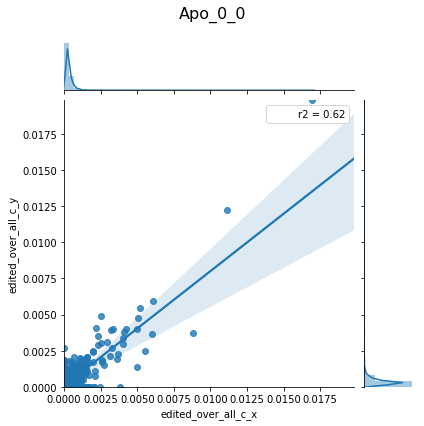

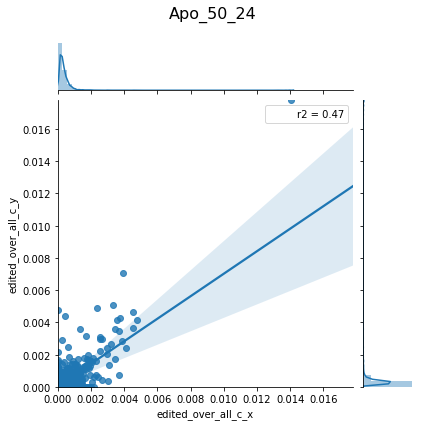

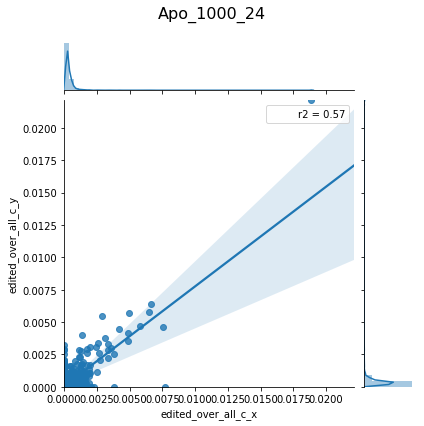

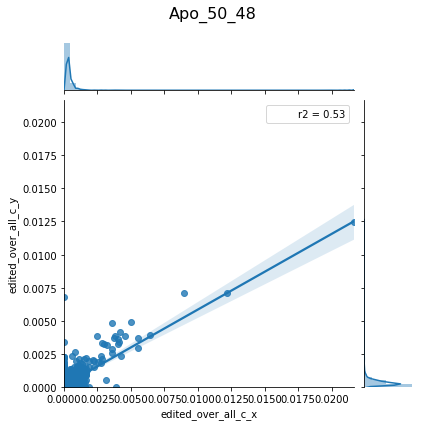

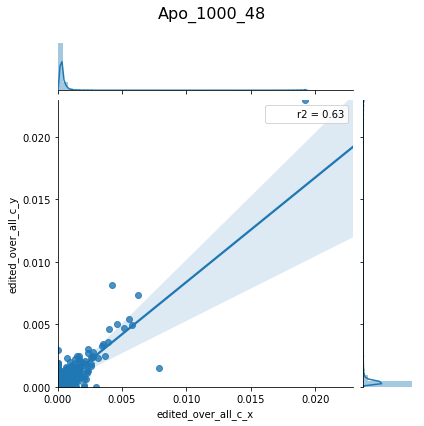

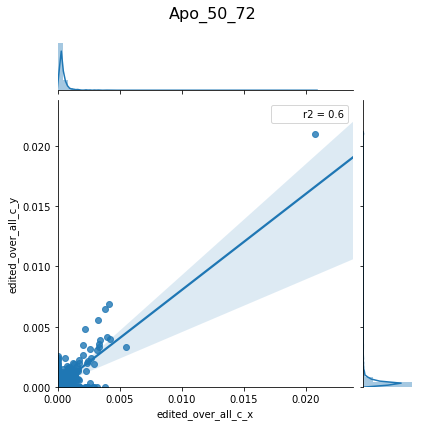

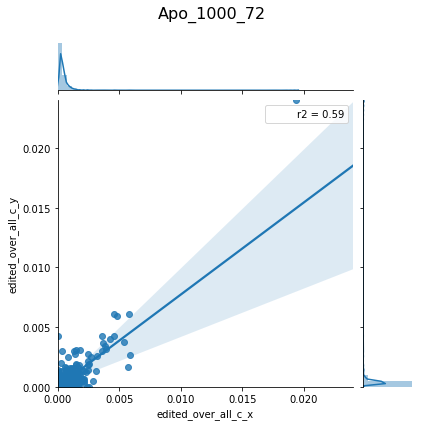

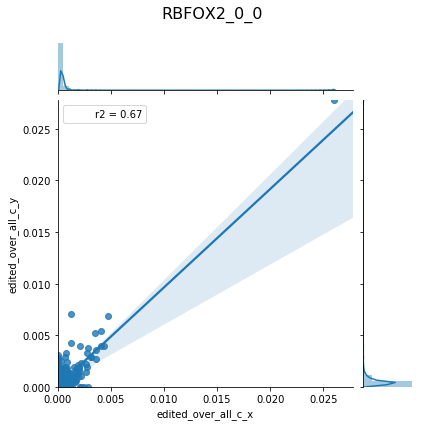

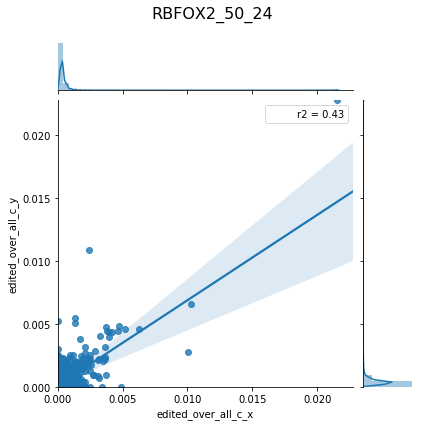

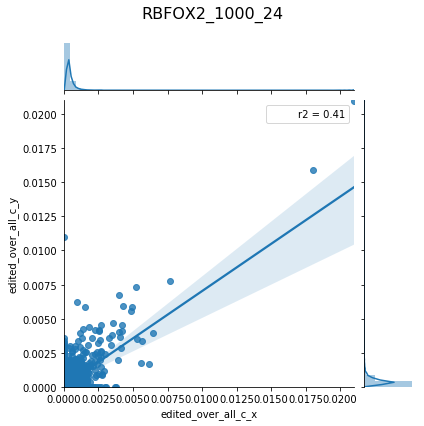

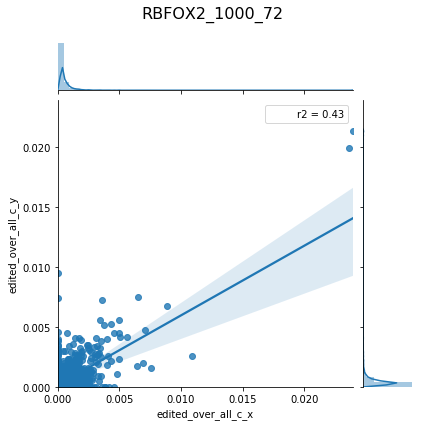

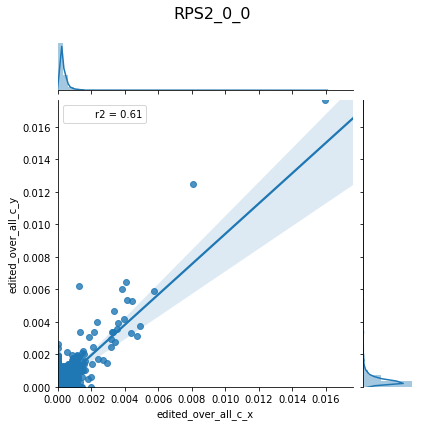

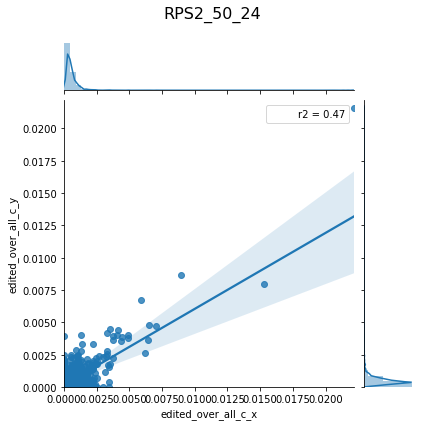

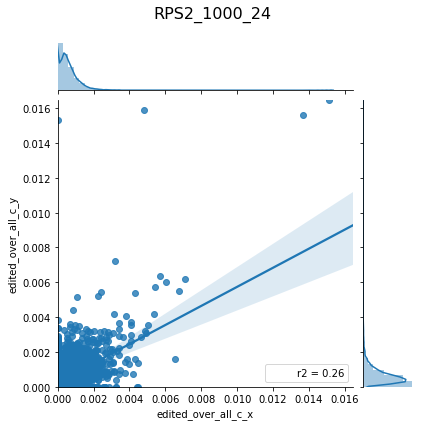

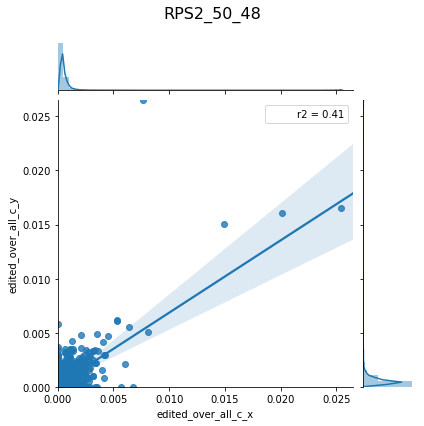

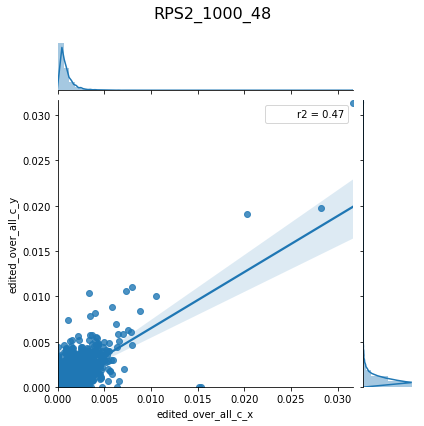

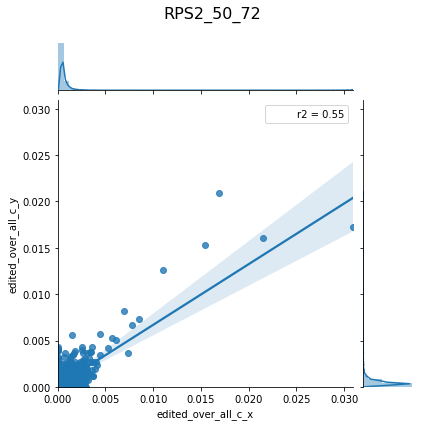

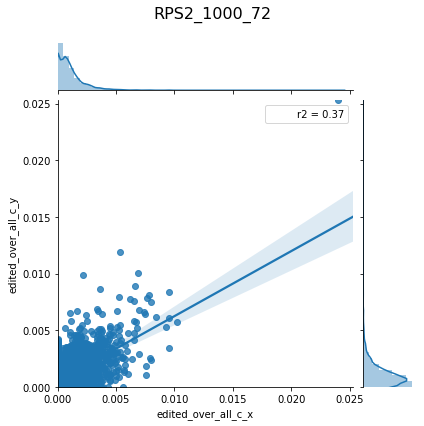

In [12]:
score = 'edited_over_all_c'

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

progress = tnrange(len(samples.keys()))
for key in samples.keys():
    if len(samples[key]) == 2:
        rep1 = pd.read_csv(samples[key][0], sep='\t')[['name',score]]
        rep1['rep'] = 1
        rep2 = pd.read_csv(samples[key][1], sep='\t')[['name',score]]
        rep2['rep'] = 2
        
        reps = pd.concat([rep1, rep2])
        
        merged = pd.merge(rep1, rep2, left_on=['name'], right_on=['name'])
        print(merged.shape[0])
        merged.dropna(inplace=True)
        print(merged.shape[0])
        # merged = merged[(merged['{}_x'.format(score)]>0) & (merged['{}_y'.format(score)]>0)]
        print(merged.shape[0])
        j = sns.jointplot(
            x='{}_x'.format(score), 
            y='{}_y'.format(score), 
            data=merged, 
            kind='reg', 
            stat_func=r2,
            xlim=(0, max(rep1[score].max(), rep2[score].max())),
            ylim=(0, max(rep1[score].max(), rep2[score].max()))
        )
        j.fig.subplots_adjust(top=0.9)
        j.fig.suptitle(key, fontsize=16)
        j.savefig(os.path.join(output_dir, '{}{}.svg'.format(key, score)))
    progress.update(1)